### IDs:
Insert yours IDs to the cell below

ID #1: 203972922

ID #2: 201312907


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

## imports 

In [1]:
import sys
print(f'install sklearn if not installed')
!{sys.executable} -m pip install sklearn
print(f'\ninstall tabulate if not installed')
!{sys.executable} -m pip install tabulate

install sklearn if not installed

install tabulate if not installed


In [2]:
# math 
import math
import numpy as np
np.random.seed(0)
import pandas as pd
from scipy import stats
from scipy.stats import geom

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# models and data
from sklearn import mixture
from sklearn.datasets import load_boston

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [3]:
boston = load_boston()

X = boston.data
y = boston.target
columns = list(boston.feature_names)
boston_df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), \
                         columns= columns + ['PRICE'])
print(boston_df[0:10].to_markdown())

|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   PRICE |
|---:|--------:|-----:|--------:|-------:|------:|------:|------:|-------:|------:|------:|----------:|-------:|--------:|--------:|
|  0 | 0.00632 | 18   |    2.31 |      0 | 0.538 | 6.575 |  65.2 | 4.09   |     1 |   296 |      15.3 | 396.9  |    4.98 |    24   |
|  1 | 0.02731 |  0   |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 | 396.9  |    9.14 |    21.6 |
|  2 | 0.02729 |  0   |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |    34.7 |
|  3 | 0.03237 |  0   |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |    33.4 |
|  4 | 0.06905 |  0   |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 |     3 |   222 |      18.7 | 396.9  |    5.33 |    36.2 |
|  5 | 0.02985 |  0   |    2.18 |      0 | 0.458 | 6.43  |  58.7 | 6.

In [4]:
#1. describe the dataset. How many samples does it contain? 
#   How many features? What is the data type for each variable?

amount_of_feature = boston_df.shape[1]-1
amount_of_sampels = boston_df.shape[0]
print('The amount of sampels is: ' + str(amount_of_sampels))
print('The amount of feature is: ' + str(amount_of_feature))
print('data type for each feature:')
boston_df.info(verbose=True)

The amount of sampels is: 506
The amount of feature is: 13
data type for each feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
#2. Produce a histogram and a boxplot of the nitric oxides concentration. 
#   describe the distribution.
NOX_feature = boston_df['NOX'].to_list()

nox_mean = np.mean(NOX_feature)
nox_median = np.median(NOX_feature)
nox_std = np.std(NOX_feature)

print(f'mean of NOX feature {nox_mean}')
print(f'median of NOX feature {nox_median}')
print(f'std of NOX feature {nox_std}')

mean of NOX feature 0.5546950592885376
median of NOX feature 0.538
std of NOX feature 0.11576311540656137


#### Histogram of the data:

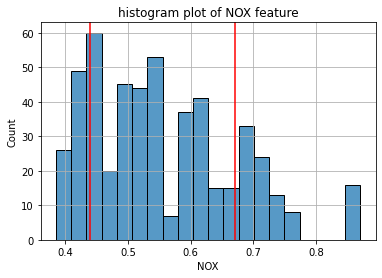

In [6]:
plt.figure()
ax = sns.histplot(x="NOX", data=boston_df, bins=20)
plt.title('histogram plot of NOX feature')
plt.grid()
plt.axvline(x = nox_mean - nox_std, color= 'r')
plt.axvline(x = nox_mean + nox_std, color= 'r')


we can see from the histogram plot that most of the data in the range 
of [mean-std,mean+std]
in our case the mean is 0.55 and the std is 0.11 -> [0.44,0.66]


#### Boxplot of the data:

* The box plot below will show the precentiles:
    1. the first line describe the 0% percentile (the min value)
    2. the secound line describe the 25% percentile (Q1)
    3. the third line describe the 50% percentile (median) 
    4. the forth line describe the 75% percentile (Q3) 
    5. the fivth line describe the 100% percentile (the max value) 
* From our box plot we can infer that the IQR(inter quartile range) is between ~0.44 to ~0.66 (which correlates with the  conclusions from the histogram) 

Text(0.5, 1.0, 'box plot of NOX feature')

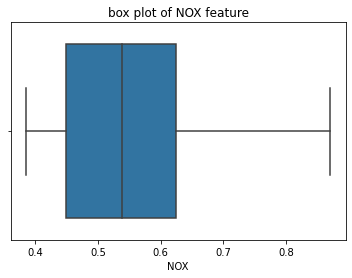

In [7]:
plt.figure()
ax = sns.boxplot(x="NOX", data=boston_df)
plt.title('box plot of NOX feature')

Text(0.5, 1.0, 'Correlation matrix of all the features')

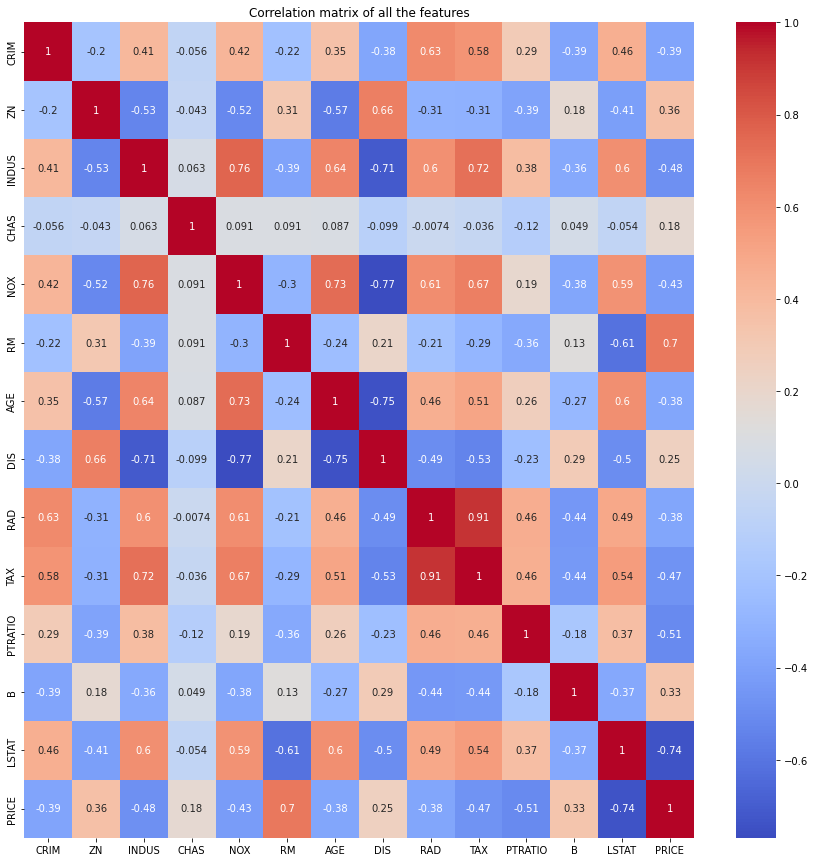

In [8]:
#3. Produce a correlation matrix of all the features. 
#   Are there any correlated features?

plt.figure(figsize=(15, 15))
sns.heatmap(boston_df.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation matrix of all the features')

#### Conclusions regarding the correlation matrix heatmap

In [9]:
corr_array = boston_df.corr().to_numpy()
np.fill_diagonal(corr_array, 0)
max_corr_row_col = np.where(corr_array == np.max(corr_array))[0]
min_corr_row_col = np.where(corr_array == np.min(corr_array))[0]

boston_df_col = boston_df.columns.to_numpy()
min_cor_features = boston_df_col[min_corr_row_col].tolist()
max_cor_features = boston_df_col[max_corr_row_col].tolist()

#string = 'The max correlation is between each feature and itself in the digonal'
#print(string)

string = 'The min corroletion found was between feature ' + min_cor_features[0] + ' to feature ' \
+ min_cor_features[1]
print(string)

string = 'The max corroletion found was between feature ' + max_cor_features[0] + ' to feature ' \
+ max_cor_features[1]
print(string)

string = 'The unusual feature is the CHAS feature; We can notice in the heat map ' + \
         'that it has very low correlation with other features'
print(string)

The min corroletion found was between feature NOX to feature DIS
The max corroletion found was between feature RAD to feature TAX
The unusual feature is the CHAS feature; We can notice in the heat map that it has very low correlation with other features


JointPlot of the pair of features with the highest correlation (positive)


Text(0.5, 0.98, 'Joint plot between RAD, TAX')

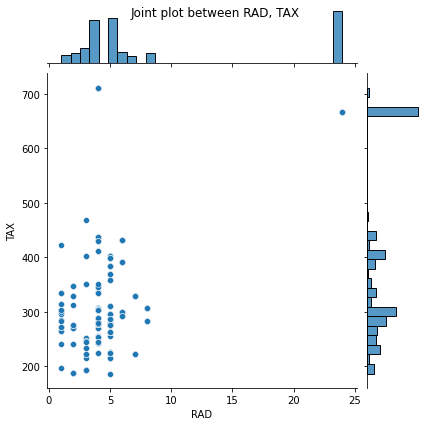

In [10]:
#4. Select the 2 pairs of features with the highest correlation
# (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
print(f'JointPlot of the pair of features with the highest correlation (positive)')
ax= sns.jointplot(x=boston_df[max_cor_features[0]], y=boston_df[max_cor_features[1]],\
              marginal_kws=dict(bins=30))
ax.fig.suptitle('Joint plot between ' + max_cor_features[0]+ ', '+ max_cor_features[1])

JointPlot of the pair of features with the highest correlation (negative)


Text(0.5, 0.98, 'Joint plot between NOX, DIS')

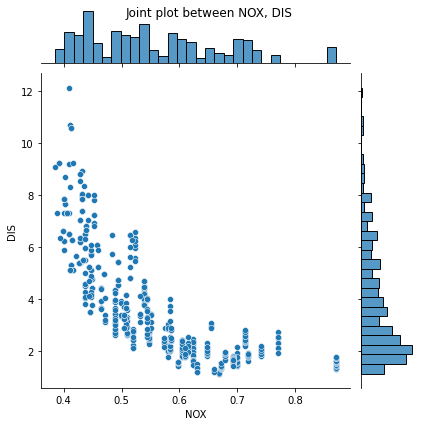

In [11]:
print(f'JointPlot of the pair of features with the highest correlation (negative)')
ax= sns.jointplot(x=boston_df[min_cor_features[0]], y=boston_df[min_cor_features[1]],\
              marginal_kws=dict(bins=30))
ax.fig.suptitle('Joint plot between ' + min_cor_features[0]+ ', '+ min_cor_features[1])

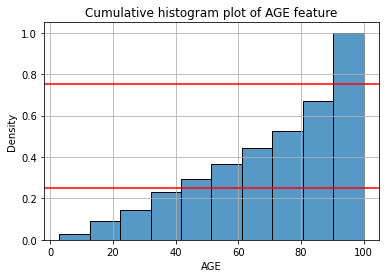

In [12]:
#5. Produce a cumulative histogram of the age variable and 
#   add two horizontal lines on the first and third quartile (on the cumulative count)

plt.figure()
ax = sns.histplot(x="AGE", data=boston_df, cumulative=True, stat='density')
plt.title('Cumulative histogram plot of AGE feature')
cumsum = boston_df['AGE'].to_numpy().cumsum()
plt.axhline(y= 0.25, color = 'r')
plt.axhline(y= 0.75, color = 'r')
plt.grid()

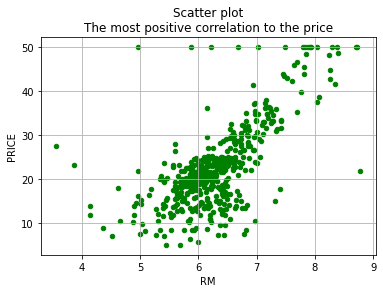

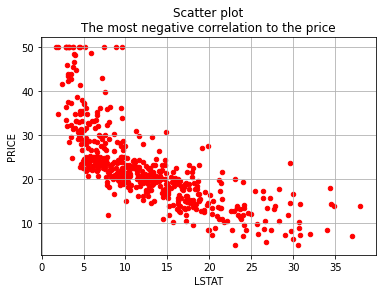

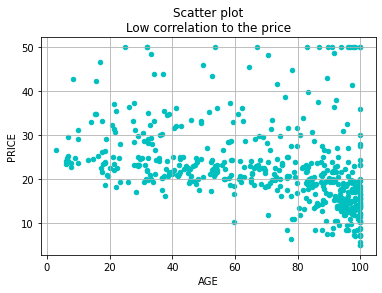

In [13]:
#6. Identify and report 2 “interesting” trends in the data. 
#   No need to provide statistical confidence at this point. 

boston_df.plot.scatter(x='RM', y='PRICE', c = 'g')
plt.title('Scatter plot\nThe most positive correlation to the price')
plt.grid()

boston_df.plot.scatter(x='LSTAT', y='PRICE', color = 'r')
plt.title('Scatter plot\nThe most negative correlation to the price')
plt.grid()

boston_df.plot.scatter(x='AGE', y='PRICE', color = 'c')
plt.title('Scatter plot\nLow correlation to the price')
plt.grid()

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

* We can think of the joint distribution of X,Y,Z as a 3 dimensional cube.
* We do not know if X,Y,Z are independent or not. this practically means we need to fill up each cell in the 3 dimensional cube (each cell represents the probability of the combination x,y,z , meaning the cell's value is $ P(X=x, Y=y, Z=z) $.
* In genral: The number of cells in this cube is $ n \cdot m \cdot k $ . we do not need to fill all $ n \cdot m \cdot k $ cells, but only $ n\cdot m \cdot k-1 $ cells (This is the reason for the "-1" in the expression. We can calculate the probability of the last combination of values for the RVs X,Y,Z by calculating 1 - sum of the probabilities of all other combinations)
* In our case: $ 2*n*m-1 $


#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

* Since X,Y,Z are iid, we can think of their joint distribution as joining 3 different dice (with n, m, k faces respectively) and of course  $ P(X,Y,Z) = P(X)*P(Y)*P(Z) $. This also means that we can treat each RV seperatly, and so:
    * X has $ n-1 $ parameters
    * Y has $ m-1 $ parameters
    * Z has $ k-1 $ parameters
    * The total number of parameters will be a sum of the above parameters.
* In genral: the amount of parameters of this joint distribution is $ n-1+m-1+k-1 $
* in our case: $ n-1+m-1+2-1 = n+m-1 $ 

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

* X and Y are conditionaly independent given Z, which means: $ P(x|y,z) = P(x|z)$
* The joint distribution between X,Y,Z could therefore be written as:
    * $ P(X,Y,Z) = P(z) \cdot P(y|z) \cdot P(x|y,z) = P(z) \cdot P(y|z) \cdot P(x|z) $
* because if the conditional independence, we can see that:
    * The number of parameters for X is dependent on Z, and so X has $ k \cdot (n-1) $ parameters 
    * The number of parameters for Y is dependent on Z, and so Y has $ k \cdot (m-1) $ parameters 
    * The number of parameters for Z is not dependent on X or Y, and so Z has $ k-1 $ parameters 

* In genral: the amount of parameters of a joint distribution is $ (k-1) + k \cdot (n-1) + k \cdot (m-1) $ 
* in our case: $ 1 + 2 \cdot (n-1) + 2 \cdot (m-1) = 2n + 2m - 3 $

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

* if we will choose Z to be $ Z=X+Y $
    * needed to show that: $  P(X,Y|Z) \neq P(X|Z)*P(Y|Z) $
    * $ P(X,Y|X+Y) = P(X,Y|X)+ P(X,Y|Y) != P(X|X+Y)*P(Y|X+Y) $
        * note that X and Y are iid
    * $ P(X|X)*P(Y|X)+ P(X|Y)*P(Y|Y) != (P(X|X)+P(X|Y))(P(Y|Y)+P(Y|X)) $

example: 
* We will define Z as a bernouli distribution of a single coin toss.
* We will define X as a standardized noraml distribution of height in the general popultion of israel (height is normally distributed, so we just standardize it).
* We will define Y as a standardized noraml distribution of height in the general popultion of norway (height is normally distributed, so we just standardize it).
* X and Y are IID, and Z has no effect on either of them.
* and so, X,Y are not conditionally independent given Z, but X,Y are IID.

<br><br><br>

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### WAY 1 - Expectation Maximization (EM)
* using sklearn's implementation of EM inside the GausianMixture class

##### Note to HW checker: please fill your own csv path below !

In [14]:
csv_path = r"GMD_2021.csv"

In [15]:
GMD_csv_df = pd.read_csv(csv_path, header=None, index_col=0)
samples = GMD_csv_df[1].to_list()

#print(df_gmd.head())
mue_1 = 4
mue_2 = 9
sigma_1 = 0.5
sigma_2 = 0.5
sigma_3 = 1.5
weight_2 = 0.25

######## way 1 #####
constraints_not_achieved = True
while constraints_not_achieved:
    mean_init_array = np.array([[mue_1],[mue_2],[np.mean(samples)]])
    weight_init = (0.25,weight_2,0.5)
    ### WAY no' 1 - Using Gaussian mixture with EM ###
    # Fit a Gaussian mixture with EM using 2 components
    gmm = mixture.GaussianMixture(n_components=3, means_init =mean_init_array ,weights_init=weight_init,  covariance_type='full').fit(GMD_csv_df)
    means = np.round(gmm.means_.reshape(3,).tolist(),0)
    weights = np.round( gmm.weights_.tolist(),3)
    if means[0] == mue_1 and means[1]== mue_2 and weights[1]== weight_2:
        constraints_not_achieved = False

print("="*20,"WAY no' 1 using Gaussian mixture with EM","="*20)
GM_result_df = pd.DataFrame()
GM_result_df['Means'] = means
GM_result_df['Weights'] = weights
print(GM_result_df)

==================== WAY no' 1 using Gaussian mixture with EM ====================
   Means  Weights
0    4.0    0.125
1    9.0    0.250
2   15.0    0.625


#### WAY 2 - Grid Search
* We will use a grid search to find our missing parameters

In [21]:
new_max= 0
new_parameters = [0,0,0]
max_value = int(np.ceil(np.mean(samples)+np.std(samples)))
min_value = int(np.round(np.mean(samples)-np.std(samples)))
for w1 in np.arange(0.05,0.325,0.05):
    w3 = 1-w1-weight_2
    for mue_3 in range (min_value,max_value):
        curr_list = [w1,w3,mue_3]
        curr_sum = 0
        for i_sample in samples:
            curr_sum += (w1*stats.norm(mue_1,sigma_1 ).pdf(i_sample)+weight_2*stats.norm(mue_2,sigma_2 ).pdf(i_sample)+w3*stats.norm(mue_3,sigma_3 ).pdf(i_sample))
        if new_max < curr_sum:
            new_parameters = curr_list
            new_max  = curr_sum
print("="*20,"WAY no' 2 using grid search to maximize MLE","="*20)
            
List = [[mue_1, new_parameters[0]], [mue_2, weight_2], [new_parameters[2], new_parameters[1]]]
GM_result_df = pd.DataFrame(List, columns = ['Means', 'Weights'])
print(GM_result_df)

==================== WAY no' 2 using grid search to maximize MLE ====================
   Means  Weights
0      4     0.05
1      9     0.25
2     15     0.70


#### WAY 3
* We will use the equations from recitation 3

* denote:
    * all = vector of all samples (denoted $ arr_concat $ in class)
    * $ s_i $ = vector of samples from the i-th gausian distribution (denoted $ arr_i $ in class)

* what is known:
    * $ w_2 $
    * $ \mu_1, \mu_2 $

* looking for:
    *  $ w_1, w_3 $
    *  $ \mu_3 $

* Deriving from the recitation's equations for parameter estimation for GMM, we get:
    * $ mean(all) = w_1 \cdot mean(s_1) + w_2 \cdot mean(s_2) + w_3 \cdot mean(s_3) $
    * $ mean(all) = w_1 \cdot \mu_1 + w_2 \cdot \mu_2 + w_3 \cdot \mu_3 $

    * $ var(all) = w_1 \cdot (var(s_1) + (mean(s_1) - mean(all))^2) + w_2 \cdot (var(s_2) + (mean(s_2) - mean(all))^2) + w_3 \cdot (var(s_3) + (mean(s_3) - mean(all))^2) $
    * and we also know: $ w_1 + w_2 + w_3 = 1 $
    
* reorganize and get
    * $ w_1 = 1 - w_2 - w_3 $
    * $ w_3 = \frac{mean(all) -  w_2 \cdot mean(s_2) - w_1 \cdot mean(s_1)}{mean(s_3)} $
    * $ \mu_3 = \frac{mean(all) -  w_2 \cdot \mu_2 - w_1 \cdot \mu_1}{w_3} $
    
* set $ w_1 $ into the above
    * $ mean(all) = (1 - w_2 - w_3) \cdot mean(s_1) + w_2 \cdot mean(s_2) + w_3 \cdot mean(s_3) $

* reorganize and get
    * $ w_3 = \frac{mean(all) - mean(s_1)  + w_2 \cdot mean(s_1) - w_2 \cdot mean(s_2)}{mean(s_3) - mean(s_1)} $

* and now that we have $ w_1 $ and $ w_3 $, ues them in the reogranized version of the equation above:
    * $ \mu_3 = \frac{mean(all) - w_1 \cdot \mu_1 - w_2 \cdot \mu_2}{w_3} $


In [40]:
print(f'After plotting the data, we saw that it is in fact 3 concatanated arrays.\nAnd so, we split them back into the 3 original arrays')
s1 = [sample for sample in samples if sample <= 6.5]
s2 = [sample for sample in samples if 6.5 < sample < 11]
s3 = [sample for sample in samples if sample >= 11]
assert len(samples) == len(s1) + len(s2) + len(s3)

w2 = 0.25
mean_s1 = np.mean(s1)
mean_s2 = np.mean(s2)
mean_s3 = np.mean(s3)
mean_all = np.mean(samples)

assert 3.5 < mean_s1 < 4.5
assert 8.5 < mean_s2 < 9.5
assert 14.5 < mean_s3 < 15.5

#
print(f'Performing calculations!\nThe results are:')

# calculate w3
w3 = (mean_all - mean_s1 + w2*mean_s1 - w2*mean_s2)/(mean_s3 - mean_s1)
w1 = 1 - w2 - w3
print(f'w3 {w3}')
print(f'w1 {w1}')

# now that we have w1 and w3, calculate mu3
mu1 = 4
mu2 = 9
mu3 = (mean_all - w1 * mu1 - w2 * mu2)/(w3)
print(f'mu3 {mu3}')


After plotting the data, we saw that it is in fact 3 concatanated arrays.
And so, we split them back into the 3 original arrays
Performing calculations!
The results are:
w3 0.6236165303171877
w1 0.12638346968281233
mu3 15.142814124212144


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

Ploting the original data with a KDE


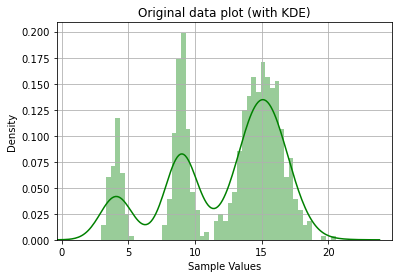

In [22]:
print('Ploting the original data with a KDE')
sns.distplot(samples,bins=50, color= 'g')
std = np.std(samples)
mean = np.mean(samples)
plt.xlim(xmin= mean-3*std , xmax= mean+3*std)
# The limits are where the cdf is 0.997 by the formula : P(μ-3s ≤ Y ≤ μ+3s) 
plt.grid()
plt.xlabel(f'Sample Values')
plt.title(f'Original data plot (with KDE)')
plt.show()

According to the lecture:


\begin{equation*}
\operatorname{f_i}(x)  = \frac{1}{\sigma_i \cdot \sqrt{2\pi}} \cdot \exp{(-\frac{(x - \mu_i)^2}{2\sigma_i^2})}
\end{equation*}


\begin{equation*}
\operatorname{f}(x)  = \sum_{i=1}^k (w_i \cdot \operatorname{f_i}(x))
\end{equation*}

In [23]:
def get_single_gausian_pdf(mu: float, sigma: float, x: float):
    result = ((1)/(sigma * math.sqrt(2*math.pi))) * math.exp((-(x-mu)**2)/(2*sigma**2))
    return result

def get_gmm_pdf(w1:float, w2:float, w3: float,
                mu1: float, mu2: float, mu3: float,
                sigma1: float, sigma2: float, sigma3: float,
                x: float):
    result = w1 * get_single_gausian_pdf(mu1, sigma1, x) +\
             w2 * get_single_gausian_pdf(mu2, sigma2, x) +\
             w3 * get_single_gausian_pdf(mu3, sigma3, x)
    return result

def get_gmm_pdf_vector(w1:float, w2:float, w3: float,
                        mu1: float, mu2: float, mu3: float,
                        sigma1: float, sigma2: float, sigma3: float,
                        x_values: list):
    result = [get_gmm_pdf(w1, w2, w3, mu1, mu2, mu3, sigma1, sigma2, sigma3, x) for x in x_values]
    return result

In [24]:
x_axis_values = np.linspace(min(samples)-1, max(samples)+1, 200)
y_axis_values = get_gmm_pdf_vector(w1=0.125, w2=0.25, w3=0.625,
                                   mu1=4, mu2=9, mu3=15,
                                   sigma1=0.5, sigma2=0.5, sigma3=1.5,
                                   x_values=x_axis_values)


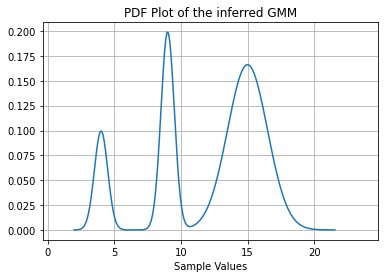

In [25]:
std = np.std(samples)
mean = np.mean(samples)
plt.plot(x_axis_values, y_axis_values)
plt.xlim(xmin= mean-3*std , xmax= mean+3*std)
# The limits are where the cdf is 0.997 by the formula : P(μ-3s ≤ Y ≤ μ+3s) 
plt.grid()
plt.xlabel(f'Sample Values')
plt.title(f'PDF Plot of the inferred GMM')
plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture 
distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways
described in section A? Explain.

In [27]:
mean_init_array = np.array([[mue_1],[mue_2],[np.mean(samples)],[np.mean(samples)]])
weight_2 = 0.25
weight_init = (0.25,weight_2,0.25,0.25)
### WAY no' 1 - Using Gaussian mixture with EM ###
print("="*20,"WAY no' 1 using Gaussian mixture with EM","="*20)
# Fit a Gaussian mixture with EM using 2 components
gmm = mixture.GaussianMixture(n_components=4,means_init =mean_init_array ,weights_init=weight_init,  covariance_type='full').fit(GMD_csv_df)

GM_result_df = pd.DataFrame()
GM_result_df['Means'] = gmm.means_.reshape(4,).tolist()
GM_result_df['Weights'] =np.round( gmm.weights_.tolist(),3)
print(GM_result_df)

==================== WAY no' 1 using Gaussian mixture with EM ====================
       Means  Weights
0   4.083811    0.125
1   9.000078    0.251
2  12.623170    0.024
3  15.204453    0.601


#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$


* WAY 1: 
    1. create a normal distrubution to each gausian with size of N
    2. create an empty GMD array
    3. do N times:
        - randomize a P(probability) that considerate the weight of each distrubution
        - add to the GMD array a value from one of the normal distrubution
    
* WAY 2:
    1. Genarate 2 normal distrubution with size of 500
    2. join  the 2 vectors into one which represent the GMD

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [28]:
mue1 = 3
mue2 = 7
mue3 = 10
sigma1 = sigma2 = sigma3 = 1
w1 = w2 = w3 = 0.33

n = 10000

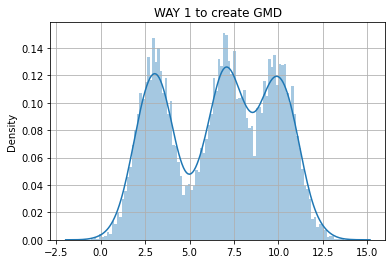

In [30]:
# Parameters of the mixture components
norm_params = np.array([[mue1, sigma1],
                        [mue2, sigma2],
                        [mue3, sigma3]])
n_components = norm_params.shape[0]

# Weight of each component, in this case all of them are 1/3
weights = np.ones(n_components, dtype=np.float64) / 3.0

# A stream of indices from which to choose the component
mixture_idx = np.random.choice(len(weights), size=n, replace=True, p=weights)

# y is the mixture sample
y = np.fromiter((stats.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys += stats.norm.pdf(xs, loc=l, scale=s) * w

# Create a plot
sns.distplot(y,bins=100)
plt.title('WAY 1 to create GMD')
plt.grid()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

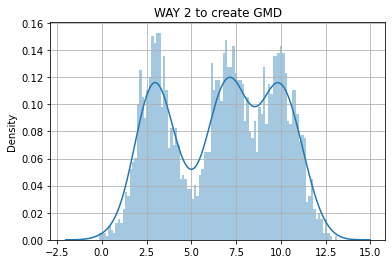

In [31]:
norm1 = np.random.normal(mue1, sigma1,1000)
norm2 = np.random.normal(mue2, sigma2,1000)
norm3 = np.random.normal(mue3, sigma3,1000)

new_norm2 = []
new_norm2.extend(norm1)
new_norm2.extend(norm2)
new_norm2.extend(norm3)

# Create the plot
plt.figure()
sns.distplot(new_norm2, bins=100)
plt.title('WAY 2 to create GMD')
plt.grid()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?
* answer
    * $ P(X<=50k)$ 


In [ ]:
mean = 70000
std = 30000
desire_sallary = 50000
less_than_50k = scipy.stats.norm(mean,std).cdf(desire_sallary)
print(less_than_50k)

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

* answer
    * $ P(60k>=X>=45K) = P(X<=65k) - P(X<=45k)$ 


In [ ]:
up_desire_sallary = 65000
down_desire_sallary = 45000

up_cdf_result = scipy.stats.norm(mean,std).cdf(up_desire_sallary)
down_cdf_result = scipy.stats.norm(mean,std).cdf(down_desire_sallary)

percent_to_sallary_between_2_values = up_cdf_result - down_cdf_result

print(percent_to_sallary_between_2_values)


more_than_desire_sallary = 70000

percent_more_than_desire_sallary = 1-scipy.stats.norm(mean,std).cdf(more_than_desire_sallary)

#### 4.C
What percent of people earn more than 70,000 RCU?

* answer
    * $ P(X>70k)= 1-P(X<=70k)$ 

In [ ]:
more_than_desire_sallary = 70000

percent_more_than_desire_sallary = 1-scipy.stats.norm(mean,std).cdf(more_than_desire_sallary)

print(percent_more_than_desire_sallary)


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?


* answer
    * $ P(X>70k)= ciel( (1-P(X<=140k))*1k ) $  

In [ ]:
more_than_desire_sallary = 140000
amount_of_employees = 1000
percent_more_than_desire_sallary = 1-scipy.stats.norm(mean,std).cdf(more_than_desire_sallary)
desire_amount_of_employees = np.ceil(amount_of_employees*percent_more_than_desire_sallary)
print(desire_amount_of_employees)

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

According to the lecture:

\begin{equation*}
\operatorname{E}(T)  = n \cdot H_n
\end{equation*}

In [ ]:
def get_harmonic_value(N: int) : 
    summed_harmonic_value = 0
    for i in range(1, N + 1) : 
        summed_harmonic_value += 1 / i 
    return summed_harmonic_value 

def get_expectation_of_T_N(N: int):
    return N*get_harmonic_value(N);

In [ ]:
N = 100
print(f'E(T_N) = {get_expectation_of_T_N(N=N)}')

#### 5.B
Write code to compute the exact value of $V(T_{N})$

$$ V(T_{N})= \sum_{i=1}^{N} Var(x_{i}) $$

In [ ]:
def get_variance_of_T_N(N: int):
    sum = 0
    for i in range(1,N+1):
        try:
            probability_of_x_i = (N-i+1)/(N)
            geom_rv = geom(probability_of_x_i)
            variance_of_x_i = geom_rv.var()
        except:
            variance_of_x_i = 0
        sum += variance_of_x_i
    return sum

In [ ]:
N = 100
print(f'V(T_N) = {get_variance_of_T_N(N=N)}')

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [19]:
def single_coupon_probabilities(n: int):
    return [(n-i) / float(n) for i in range(n)]

def get_exact_bound(N: int, threshold: int):
    
    probabilities = single_coupon_probabilities(N)
    #print(f'probabilities {probabilities}')
    
    x = list(range(1,threshold+1))
    #print(f'x {x}')

    p = probabilities[0]
    #print(f'p {p}')
    geom_rv = geom(p)
    distribution = geom_rv.pmf(x)
    #print(f'distribution {distribution}')
    
    for p in probabilities[1:]:
        #print(f'\ncurrent: {p} in p[1:] {probabilities[1:]}')
        geom_rv = geom(p)
        geom_probabilities = geom_rv.pmf(x)
        #print(f'geom_probabilities {geom_probabilities}')
        distribution = np.convolve(distribution, geom_probabilities)
        #print(f'distribution {distribution}')
                
    end_index = threshold+1-N
    result =  1 - sum(distribution[:end_index])
    return result

In [20]:
print(f'Exact bound with N = 30 and threshold = 60 is: {get_exact_bound(30, 60)}')

Exact bound with N = 30 and threshold = 60 is: 0.9940158432042814


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [ ]:
def get_chebychev_bound(N: int, threshold: int):
    '''
    formula:
    P(mu - b*sigma <= X <= mu + b*sigma) >= 1 - (1/b**2)
    
    note:
    mu - b*sigma <= X <= mu + b*sigma
    
    we want:
    60 <= T_30 <= doesnt matter
    
    and so we derive:
    60 = mu - b*sigma
    b*sigma = mu - 60
    b = (mu - 60)/(sigma)
    
    then we can calculate the chebichev bound using b:
    bound = 1 - 1/b**2
    '''
    mu = get_expectation_of_T_N(N)
    var = get_variance_of_T_N(N)
    sigma = np.sqrt(var)
    chebichev_b_value = (mu - threshold)/(sigma)
    #print(f'mu {mu}, sigma {sigma}, chebichev_b_value {chebichev_b_value}')
    probability = 1 - (1/(chebichev_b_value**2))
    return probability

In [ ]:
print(f'Chebychev bound for N=30, with threshold = 60 is: {get_chebychev_bound(30, 60)}')